In [15]:
# Import Dependancies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [16]:
# Generate example dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=42)

# Create a dataframe with th example data
df =pd.DataFrame(X,columns=["Feature 1", "Feature 2"])
df["Target"] = y

df.head()

,Feature 1,Feature 2,Target
0,-1.673506,7.884579,0
1,6.317580,1.419581,1
2,3.543604,0.533119,1
3,5.162714,1.399470,1
4,4.459399,5.166277,1


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

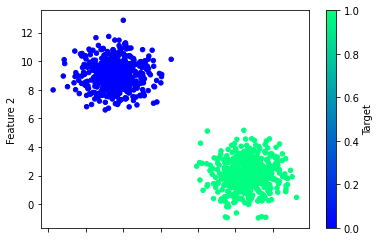

In [17]:
# Plot the data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", cmap="winter")

In [18]:
# Use sklearn to split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Create the keras Sequential model

nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [21]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 499us/step - loss: 0.5862 - accuracy: 0.8253
Epoch 2/100
24/24 [==============================] - 0s 559us/step - loss: 0.5689 - accuracy: 0.9093
Epoch 3/100
24/24 [==============================] - 0s 554us/step - loss: 0.5514 - accuracy: 0.9253
Epoch 4/100
24/24 [==============================] - 0s 512us/step - loss: 0.5338 - accuracy: 0.9360
Epoch 5/100
24/24 [==============================] - 0s 526us/step - loss: 0.5162 - accuracy: 0.9480
Epoch 6/100
24/24 [==============================] - 0s 577us/step - loss: 0.4989 - accuracy: 0.9587
Epoch 7/100
24/24 [==============================] - 0s 488us/step - loss: 0.4819 - accuracy: 0.9667
Epoch 8/100
24/24 [==============================] - 0s 487us/step - loss: 0.4656 - accuracy: 0.9733
Epoch 9/100
24/24 [==============================] - 0s 500us/step - loss: 0.4496 - accuracy: 0.9760
Epoch 10/100
24/24 [==============================] - 0s 505us/step - loss: 0.4342 - accura

<AxesSubplot:>

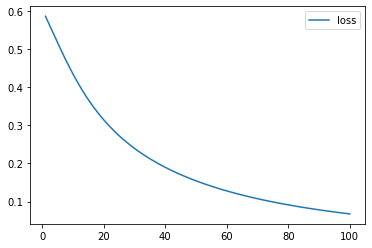

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

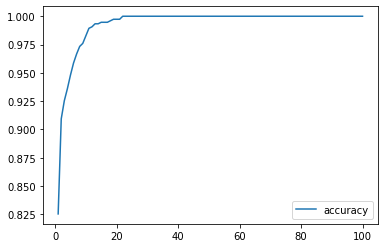

In [25]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0681 - accuracy: 1.0000
Loss: 0.06811106204986572, Accuracy: 1.0


## Working with nonlinear data